In [6]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.T.duplicated()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
X = df.iloc[:,:-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
Y = df.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#Univariate Selection

In [12]:
# Apply SelectKBest Algorithm

rank = SelectKBest(score_func=chi2, k=4)
ordered_features = rank.fit(X, Y)
ordered_features

,score_func,<function chi...002145C784540>
,k,4


In [13]:
ordered_features.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [14]:
dfscores = pd.DataFrame(ordered_features.scores_)
dfscores

,0
0,111.519691
1,1411.887041
2,17.605373
3,53.108040
4,2175.565273
5,127.669343
6,5.392682
7,181.303689


In [15]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns

,0
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age


In [16]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank

,0,0
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [17]:
features_rank.columns = ['Features', 'Scores']
features_rank

,Features,Scores
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [18]:
features_rank.nlargest(5, 'Scores')

,Features,Scores
4,Insulin,2175.565273
1,Glucose,1411.887041
7,Age,181.303689
5,BMI,127.669343
0,Pregnancies,111.519691


##Feature Importance

This techique gives you a score for each feature of your data, the higher the score, the more relevant it is

In [19]:
model = ExtraTreesClassifier()
model.fit(X,Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [20]:
print(model.feature_importances_)

[0.10932687 0.23154062 0.1010198  0.08015983 0.07512026 0.14164135
 0.11796808 0.14322319]


In [21]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features

Pregnancies                 0.109327
Glucose                     0.231541
BloodPressure               0.101020
SkinThickness               0.080160
Insulin                     0.075120
BMI                         0.141641
DiabetesPedigreeFunction    0.117968
Age                         0.143223
dtype: float64

<Axes: >

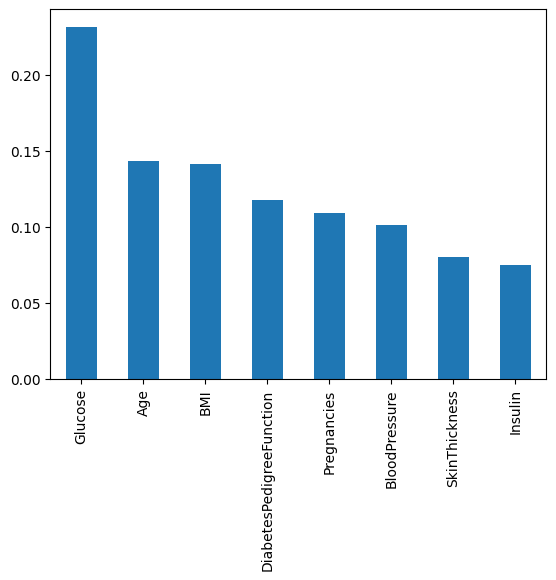

In [22]:
ranked_features.nlargest(10).plot.bar()